In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0


In [0]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [0]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [0]:
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2952 - accuracy: 0.5530 - val_loss: 1.0063 - val_accuracy: 0.6501
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8475 - accuracy: 0.7050 - val_loss: 0.8629 - val_accuracy: 0.7049
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6882 - accuracy: 0.7637 - val_loss: 0.7488 - val_accuracy: 0.7445
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5907 - accuracy: 0.7985 - val_loss: 0.8112 - val_accuracy: 0.7344
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4984 - accuracy: 0.8287 - val_loss: 0.9862 - val_accuracy: 0.6937
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4253 - accuracy: 0.8533 - val_loss: 0.7020 - val_accuracy: 0.7834
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3629 - accuracy: 0.8744 - val_loss: 0.6075 - val_accuracy:

In [10]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off

batch_size =32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator = data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch = x_train.shape[0]//batch_size
r = model.fit(train_generator,validation_data=(x_test,y_test),steps_per_epoch=steps_per_epoch,epochs=50)

Epoch 1/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.5406 - accuracy: 0.8296 - val_loss: 0.5053 - val_accuracy: 0.8386
Epoch 2/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.4354 - accuracy: 0.8536 - val_loss: 0.4724 - val_accuracy: 0.8506
Epoch 3/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.4015 - accuracy: 0.8660 - val_loss: 0.5328 - val_accuracy: 0.8379
Epoch 4/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.3824 - accuracy: 0.8736 - val_loss: 0.4647 - val_accuracy: 0.8507
Epoch 5/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.3605 - accuracy: 0.8782 - val_loss: 0.4290 - val_accuracy: 0.8564
Epoch 6/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.3485 - accuracy: 0.8847 - val_loss: 0.4158 - val_accuracy: 0.8592
Epoch 7/50
1562/1562 [==============================] - 23s 15ms/step - loss: 0.3377 - accuracy: 0.8852 - val_loss: 0.4806 -

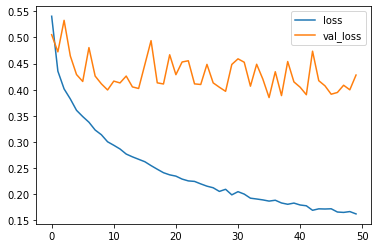

In [11]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

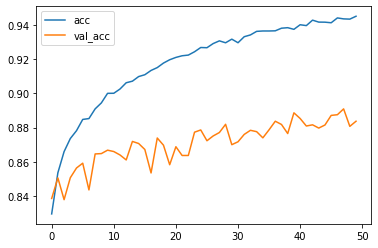

In [12]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[919  10  19   7   5   1   6   3  24   6]
 [  4 967   0   0   0   1   2   0   3  23]
 [ 40   1 826  24  26  26  38  11   2   6]
 [ 12   2  33 721  29 116  53  17   5  12]
 [  8   1  39  21 853  26  37  12   1   2]
 [  9   4  15  86  16 834  19  13   1   3]
 [  6   0  19  14   1   8 948   1   2   1]
 [  8   2   8  16  20  30   7 905   1   3]
 [ 29   7   2   7   2   2   1   0 938  12]
 [  9  44   1   3   0   0   1   2  14 926]]


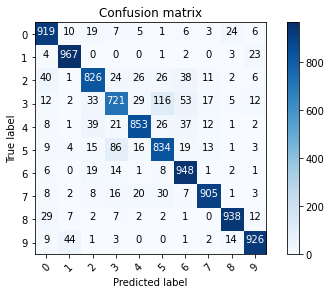

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

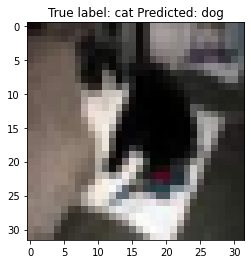

In [16]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [17]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 